# THE SPARKS FOUNDATION

## Task 6 by: Samiksha Mulik

Task 6: Prediction using Decision Tree Algorithm

Objective: Create the Decision Tree classifier and visualize it graphically.

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from sklearn import tree

In [23]:
#loading dataset
data=pd.read_csv("Iris.csv")

In [24]:
#display first 5 rows
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [27]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Dividing data into input and outut values

In [28]:
# Dropping Id column
X=data.drop(['Id','Species'],axis=1)

In [29]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [30]:
# taking target column.
Y=data['Species']

In [31]:
Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

## Converting String values into integers by using label encoding

In [32]:
# encode string class values as integers
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
label_encoded_y = label_encoder.transform(Y)

In [33]:
label_encoded_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Splitting data into train and test model

In [34]:
from sklearn.model_selection import train_test_split
X_train ,X_test, Y_train, Y_test=train_test_split(X,label_encoded_y,test_size=0.33,random_state=1234)

## Applying Decision Tree Algorithm

In [35]:
from sklearn.tree import DecisionTreeClassifier 
clf=DecisionTreeClassifier()
clf.fit(X_train ,Y_train)

DecisionTreeClassifier()

In [36]:
#predicting values.
y_predict=clf.predict(X_test)

In [37]:
#comparing predicted and actual values.
pred=pd.DataFrame({'Actual' : Y_test,'Predicted': y_predict})
pred.head()

,Actual,Predicted
0,1,1
1,1,1
2,2,2
3,0,0
4,1,1


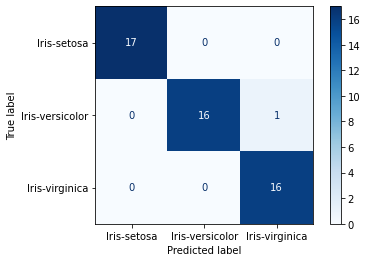

In [38]:
#Displaying Confusion matrix.
import matplotlib.pyplot as plt  
from sklearn.metrics import plot_confusion_matrix
labels = Y.unique()
plot_confusion_matrix(clf, X_test, Y_test, cmap=plt.cm.Blues, display_labels=labels,normalize=None)  
plt.show()

In [39]:
from sklearn.metrics import accuracy_score,classification_report
score = accuracy_score(Y_test,y_predict)
print(score)
print(classification_report(Y_test,y_predict))

0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.94      0.97        17
           2       0.94      1.00      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



## Visualization of Decision Tree

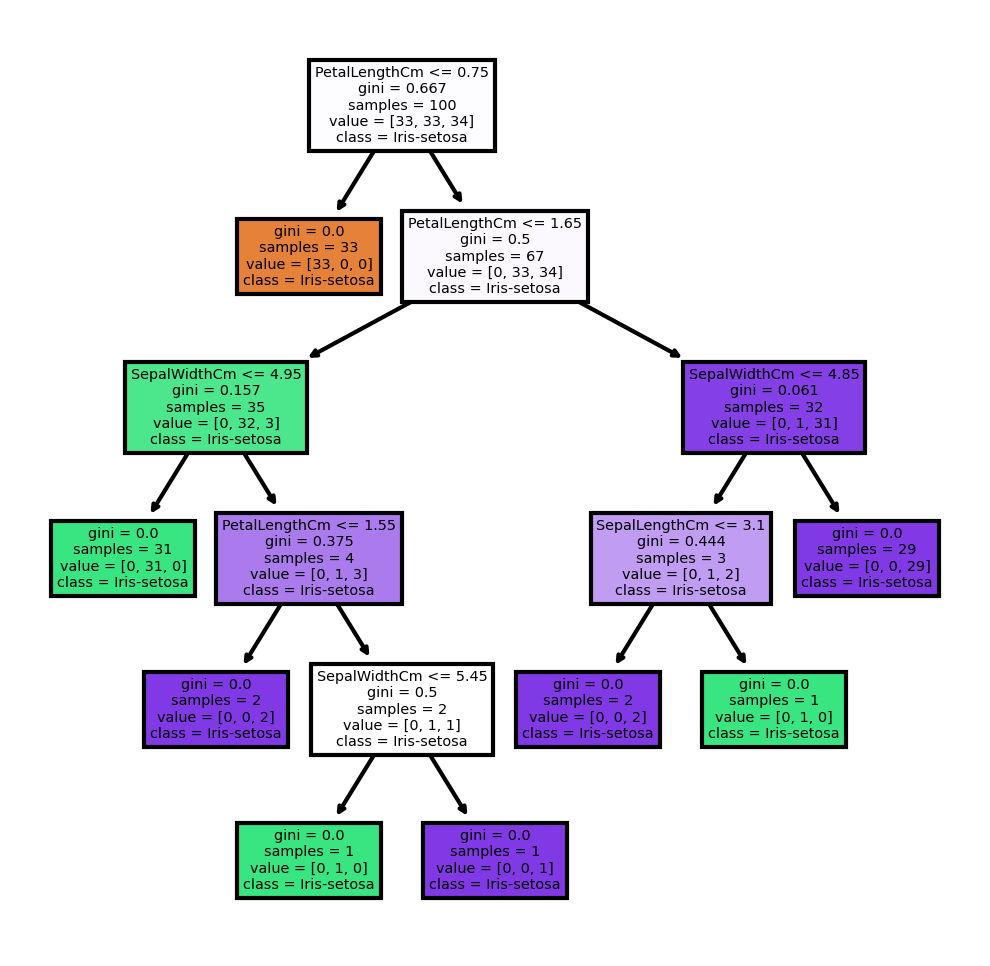

In [40]:
from matplotlib import pyplot as plt
fig,axes = plt.subplots(figsize=(4,4),dpi=300,nrows=1,ncols=1)
fig=tree.plot_tree(clf, 
                   feature_names=data.columns,
                   class_names=data.Species,  
                   filled=True)